# **MINOR PROJECT**

--- Wind Speed Prediction Dataset






# **TASK 1** - Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('wind_dataset.csv')

In [ ]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
data.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G'],
      dtype='object')

In [ ]:
data.shape

(6574, 9)

<-----------------------Question 1----------------------------->

--Are there any missing values in the dataset? If so, how will you handle them?

--How is the wind speed distributed in the dataset?

--Are there any outliers or extreme values?

In [ ]:
data.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [ ]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [ ]:
#  Replacing nan values wth their mean values
data['IND.1']=data['IND.1'].fillna(0.39)
data['IND.2']=data['IND.2'].fillna(0.46)
data['T.MAX']=data['T.MAX'].fillna(13.33)
data['T.MIN']=data['T.MIN'].fillna(6.41)
data['T.MIN.G']=data['T.MIN.G'].fillna(2.73)


In [ ]:
# No missing values
data.isna().sum().sum()

0

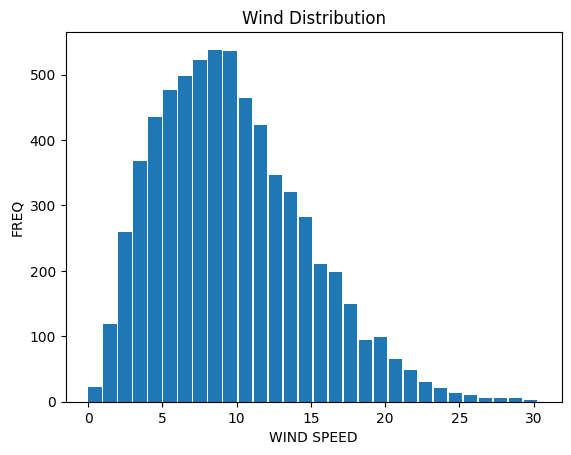

In [ ]:
# plotting wind speed distribution
plt.hist(data['WIND'],bins=30,width=0.9)
plt.xlabel('WIND SPEED')
plt.ylabel('FREQ')
plt.title('Wind Distribution')
plt.show()

In [ ]:
data['WIND'].describe()

count    6574.000000
mean        9.796834
std         4.977272
min         0.000000
25%         6.000000
50%         9.210000
75%        12.960000
max        30.370000
Name: WIND, dtype: float64

<Axes: >

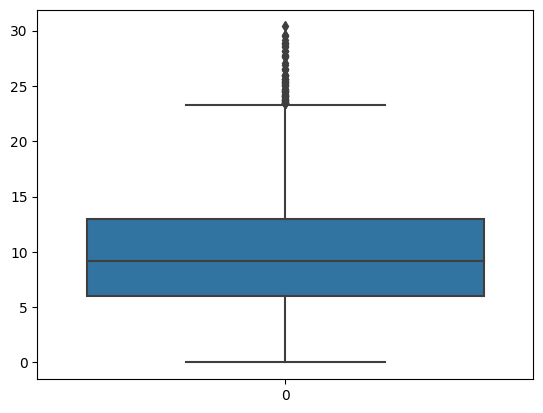

In [ ]:
import seaborn as sns
sns.boxplot(data['WIND'])

#Summarizing your analysis and observation

-- We have replaced the missing values with the mean of that feature..

-- In above Boxplot WIND SPEED above 22.5 are acting as Outliers or extreme values..

<-----------------------Question 2----------------------------->

--How does the wind speed vary over time?

--Can you visualize any trends or patterns using line plots or time series analysis?

In [ ]:
data.info()
# DATE is an object need to be converted into a datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6574 non-null   float64
 5   T.MAX    6574 non-null   float64
 6   IND.2    6574 non-null   float64
 7   T.MIN    6574 non-null   float64
 8   T.MIN.G  6574 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [ ]:
#converting the DATE dtype from object to a datetime

data['DATE'] = pd.to_datetime(data['DATE'])

data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month

In [ ]:
data.head()
# data.info()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1


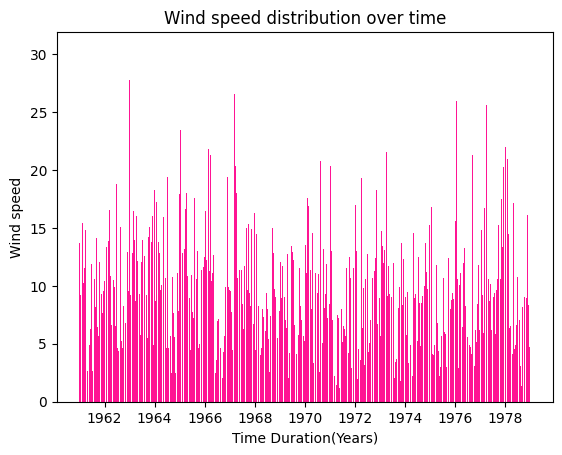

In [ ]:
plt.bar(data['DATE'],data['WIND'],color="deeppink")
plt.xlabel('Time Duration(Years)')
plt.ylabel('Wind speed')
plt.title('Wind speed distribution over time')
plt.show()

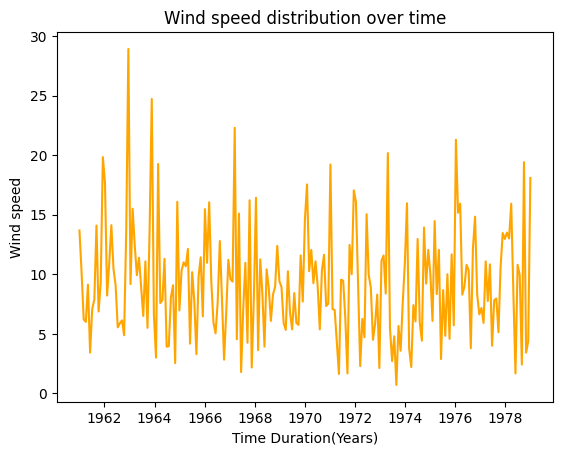

In [ ]:
# plt.bar(data['DATE'],data['WIND'])
plt.plot(data['DATE'][0:6574:31],data['WIND'][0:6574:31],c="orange")
plt.xlabel('Time Duration(Years)')
plt.ylabel('Wind speed')
plt.title('Wind speed distribution over time')
plt.show()


<-----------------------Question 3----------------------------->

--Are there any seasonal patterns in wind speed or other weather variables?

--Analyze and visualize these patterns using seasonal decomposition or seasonal subseries plots?

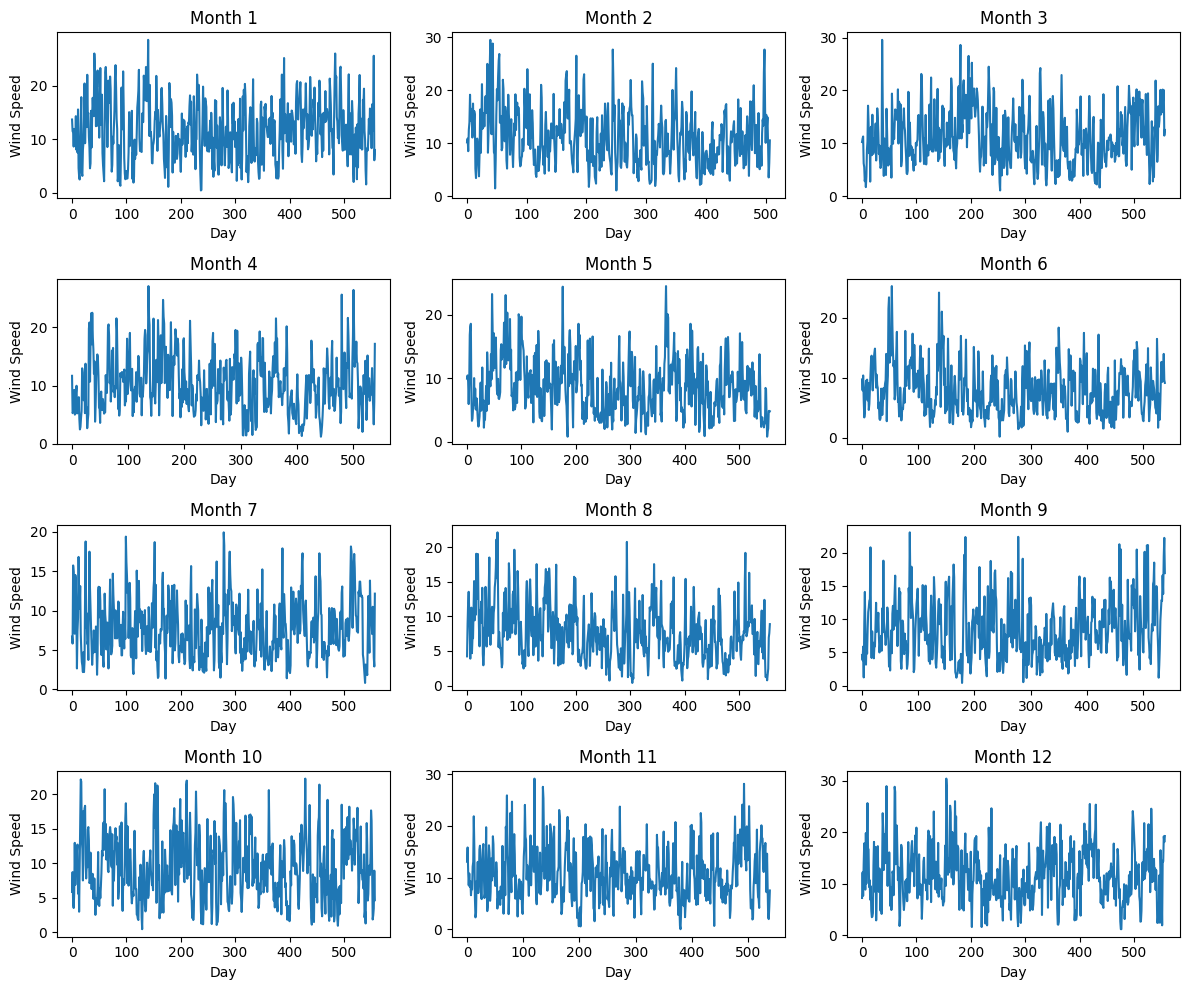

In [ ]:

months = data['MONTH']
wind_speed=data['WIND']

# Grouping wind speeds by month
monthly_wind_speeds = []
for month in range(1, 13):
    wind_speeds = [wind_speed for wind_speed, month_value in zip(wind_speed, months) if month_value == month]
    monthly_wind_speeds.append(wind_speeds)

# Plotting the subseries
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

for i in range(4):
    for j in range(3):
        ax[i, j].plot(monthly_wind_speeds[i * 3 + j])
        ax[i, j].set_title(f'Month {i * 3 + j + 1}')
        ax[i, j].set_xlabel('Day')
        ax[i, j].set_ylabel('Wind Speed')

plt.tight_layout()
plt.show()



Summarizing your analysis and observation

-- Maximum wind speed is seen during Autumn Season (Month 9-11) and Spring season(Month 2-3)

<-----------------------Question 4----------------------------->

--What is the distribution of other weather variables such as precipitation amount, maximum temperature, minimum temperature, and grass minimum temperature?

-- Visualize their distributions using histograms or density plots.

In [ ]:
data['RAIN'].value_counts()

0.0     2855
0.1      284
0.2      283
0.3      181
0.4      151
        ... 
24.2       1
27.9       1
20.5       1
28.3       1
28.2       1
Name: RAIN, Length: 226, dtype: int64

<Axes: xlabel='RAIN', ylabel='Count'>

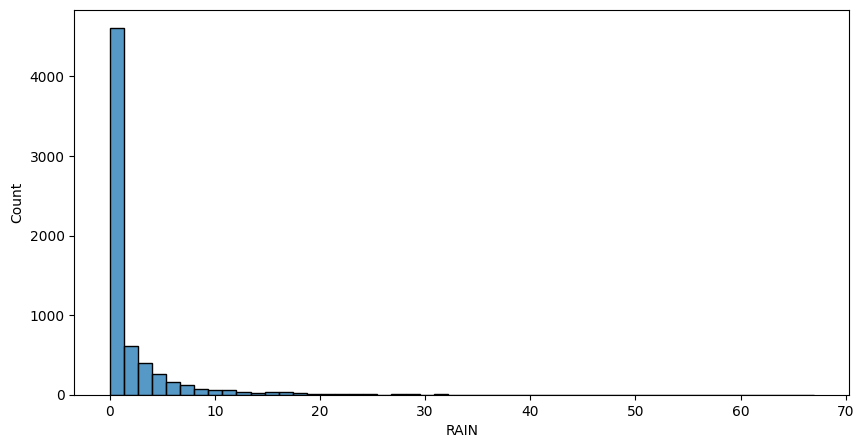

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['RAIN'], bins=50)

In [ ]:
data['T.MAX'].value_counts()

 13.33    621
 10.00     80
 15.50     69
 18.00     68
 11.00     68
         ... 
-0.10       1
 25.50      1
 1.00       1
 1.70       1
 1.60       1
Name: T.MAX, Length: 247, dtype: int64

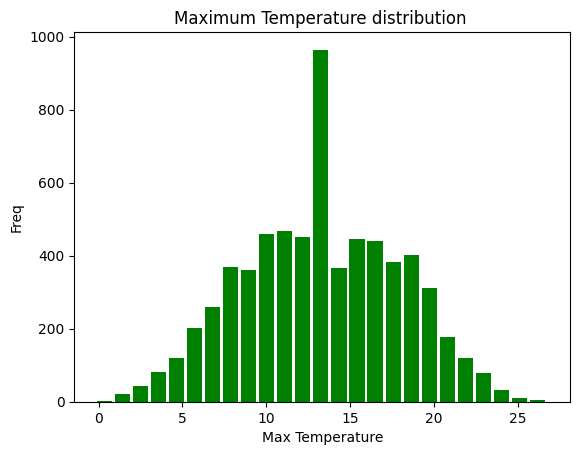

In [ ]:
# Maximum Temperature distribution
plt.hist(data['T.MAX'], bins=25,color="green",width=0.9)
plt.xlabel('Max Temperature')
plt.ylabel('Freq')
plt.title('Maximum Temperature distribution ')
plt.show()



In [ ]:
data['T.MIN'].value_counts()

 6.41     674
 9.00      90
 5.00      88
 6.00      86
 10.00     79
         ... 
-4.70       1
-8.10       1
 18.00      1
-6.60       1
 15.10      1
Name: T.MIN, Length: 248, dtype: int64

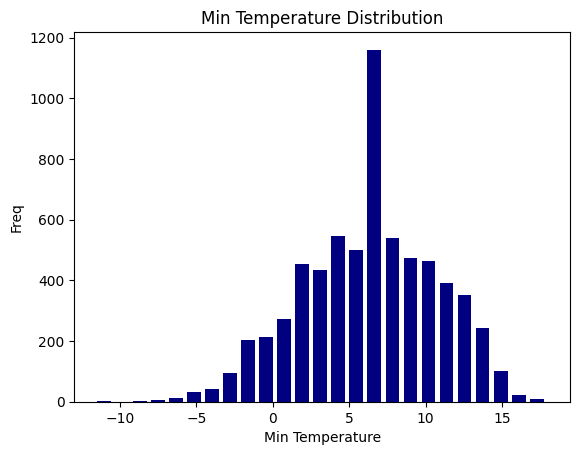

In [ ]:
# Min Temperature Distribution
plt.hist(data['T.MIN'], bins=25,color='navy',width=0.9)
plt.xlabel('Min Temperature')
plt.ylabel('Freq')
plt.title('Min Temperature Distribution')
plt.show()

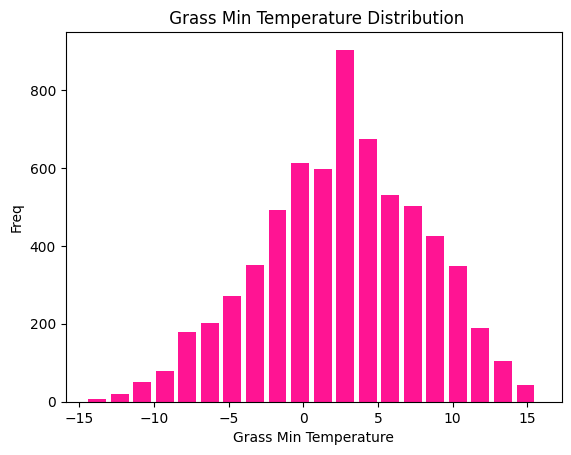

In [ ]:
plt.hist(data['T.MIN.G'], bins=20,color='deeppink',width=1.2)
plt.xlabel('Grass Min Temperature')
plt.ylabel('Freq')
plt.title(' Grass Min Temperature Distribution')
plt.show()

Summarizing your analysis and observations

<-----------------------Question 5----------------------------->

--Extract any additional features from the given dataset that may be relevant for wind speed prediction?

-- HINT- For example, you could calculate daily or monthly averages, differences, or time lags of the weather variables.

<ipython-input-29-7eb93387dc86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

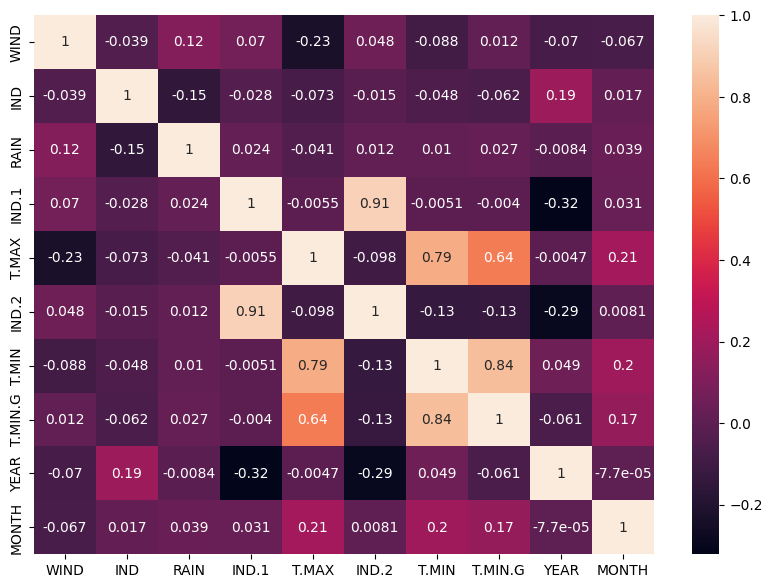

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

Summarizing your analysis and observation

* As we can observe clearly from the above heatmap that the wind is more positively correlated to rain(0.12)

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



### Feature Engineering

In [ ]:
data=data.drop(columns=['DATE','IND','IND.1','IND.2'])

In [ ]:
data.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G,YEAR,MONTH
0,13.67,0.2,9.5,3.7,-1.0,1961,1
1,11.50,5.1,7.2,4.2,1.1,1961,1
2,11.25,0.4,5.5,0.5,-0.5,1961,1
3,8.63,0.2,5.6,0.4,-3.2,1961,1
4,11.92,10.4,7.2,-1.5,-7.5,1961,1


In [ ]:
X=data.drop(columns=['WIND'])
X

,RAIN,T.MAX,T.MIN,T.MIN.G,YEAR,MONTH
0,0.2,9.5,3.7,-1.0,1961,1
1,5.1,7.2,4.2,1.1,1961,1
2,0.4,5.5,0.5,-0.5,1961,1
3,0.2,5.6,0.4,-3.2,1961,1
4,10.4,7.2,-1.5,-7.5,1961,1
...,...,...,...,...,...,...
6569,16.8,9.8,4.0,0.0,1978,12
6570,16.0,9.1,8.5,8.0,1978,12
6571,14.7,5.0,3.5,3.2,1978,12
6572,4.9,2.9,0.3,-0.5,1978,12


In [ ]:
Y=data['WIND']
Y

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6569    14.46
6570    14.33
6571    19.17
6572    18.08
6573    19.25
Name: WIND, Length: 6574, dtype: float64

In [ ]:
X.shape ,Y.shape

((6574, 6), (6574,))

### splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape , Y_train.shape

((5259, 6), (5259,))

In [ ]:
X_test.shape , Y_test.shape

((1315, 6), (1315,))

### Model Selection and Training

* Linear regression model is selected to interpret continous wind speed

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating a model
model=LinearRegression()

In [ ]:
# Training the model using Training data
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.coef_.round(1)

array([ 0.1, -0.4,  0. ,  0.2, -0.1, -0.1])

In [ ]:
model.intercept_.round(1)

141.3

* equation of a hyperplane

 w0+w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6 =0

In [ ]:
Y_pred=model.predict(X_test)
Y_pred.round(2)

array([10.35,  7.97,  9.23, ..., 10.78, 11.36,  9.08])

In [ ]:
Y_pred[0]

10.353641005171653

In [ ]:
Y_test[:]

4867     7.41
4861     3.29
5422     8.58
4071    14.42
1992    10.34
        ...  
3515    10.41
1628    13.42
6496     7.41
4136    15.04
3029     8.67
Name: WIND, Length: 1315, dtype: float64

In [ ]:
model.score(X_test,Y_test)

0.10944442107929231

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_pred)

3.730710152644391

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mse

21.50438919948701

In [ ]:
# Root mean squared error
Rmse=np.sqrt(mse)
Rmse

4.63728252314726

##Tuning the model using hyperparams tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor(random_state=20,max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, random_state=20)

In [ ]:
y_pred=model.predict(X_test)
y_pred[:5]

array([ 9.42676471,  7.22180905, 11.11004717, 12.4333853 , 10.85049107])

In [ ]:
Y_test[:5]

4867     7.41
4861     3.29
5422     8.58
4071    14.42
1992    10.34
Name: WIND, dtype: float64

In [ ]:
model.score(X_test,Y_test)

0.1800453383058066

In [ ]:
model.score(X_train,Y_train)

0.22257124326497113

## Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbdt=GradientBoostingRegressor(max_depth=2,random_state=20)

In [ ]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=2, random_state=20)

In [ ]:
gbdt.score(X_test,Y_test)

0.24595147419087882

In [ ]:
gbdt.score(X_train,Y_train)

0.26944640375218054